In [85]:
source("Main.R")
source("Conf.R")
source("Utilities.R")
source("DAVID_query.R")
library("factoextra")
library("maptree")
library(repr)
library(reshape)


We computed the interaction terms between the clusters and the KOs. In this notebook we try to see whether there is a significant effect size shift for each of the ICA factors for the clusters.

In [86]:
##Get the gene modules
cGenes = data.frame(read.csv('/home/beraslan/jovian-work/analysisSingle/ME_GeneModules_leiden_8_Modules.csv'), stringsAsFactors = FALSE, row.names = 1)
#cGenes = cGenes[order(cGenes$GeneGroup),]
colnames(cGenes) <- c("respGene", "GeneGroup","GeneColor")
head(cGenes)
cGenes$GeneGroup <- factor(cGenes$GeneGroup, levels=unique(cGenes$GeneGroup))

,respGene,GeneGroup,GeneColor
,<fct>,<int>,<fct>
AI314180,AI314180,3,#E7298A
Abcc1,Abcc1,3,#E7298A
Acod1,Acod1,3,#E7298A
Akr1a1,Akr1a1,3,#E7298A
Alas1,Alas1,3,#E7298A
Alox5ap,Alox5ap,3,#E7298A


In [87]:
unique(cGenes$GeneGroup)

[1] 3 6 7 2 4 0 1 5
Levels: 3 6 7 2 4 0 1 5

In [88]:
cGuides = data.frame(read.csv('/home/beraslan/jovian-work/analysisSingle/ME_GuideModules_leiden_6_Modules.csv'), stringsAsFactors = FALSE, row.names = 1)
#cGuides = cGuides[order(cGenes$GeneGroup),]
colnames(cGuides) <- c("KOGeneName", "GuideGroup","GuideColor")
cGuides$GuideGroup <- factor(cGuides$GuideGroup, levels=unique(cGuides$GuideGroup))

head(cGuides)

,KOGeneName,GuideGroup,GuideColor
,<fct>,<fct>,<fct>
Aamp,Aamp,4,#aa40fc
Bop1,Bop1,4,#aa40fc
Cirh1a,Cirh1a,4,#aa40fc
Dcaf13,Dcaf13,4,#aa40fc
Grb2,Grb2,4,#aa40fc
Myc,Myc,4,#aa40fc


In [89]:
unique(cGuides$GuideGroup)

[1] 4 0 1 5 3 2
Levels: 4 0 1 5 3 2

In [90]:
allData <- data.frame(readRDS("/home/beraslan/jovian-work/analysisSingle/ClusterInteractions/AllCoefsCombined_FDR.rds"))
allData <- unique(allData)
rownames(allData) = paste0(allData$term,"_",allData$respGene)

In [91]:
## Get the computed interaction terms
interactionTerms <- allData[grepl('*\\:leiden*', allData$term),]
#interactionTerms <- interactionTerms[interactionTerms$FDR < 0.15,]
interactionTerms$KOGene <- sapply(interactionTerms$term, function(x){strsplit(x, ":")[[1]][1]})
interactionTerms$Cluster <- sapply(interactionTerms$term, function(x){strsplit(x, ":")[[1]][2]})


In [92]:
interactionTerms$baseLevelEstimate = allData[paste0(interactionTerms$KOGene, "_",interactionTerms$respGene),"estimate"]
interactionTerms$baseLevelPvals = allData[paste0(interactionTerms$KOGene, "_",interactionTerms$respGene),"p.value"]
interactionTerms = interactionTerms[interactionTerms$baseLevelPvals < 0.05,] 

## Get base level (cluster 0) beta estimates
interactionTerms$netEffect = interactionTerms$baseLevelEstimate
interactionTerms[interactionTerms$p.value < 0.05,"netEffect"] = interactionTerms[interactionTerms$p.value < 0.05,"baseLevelEstimate"] + interactionTerms[interactionTerms$p.value < 0.05,"estimate"]

interactionTerms$KOGeneName = sapply(interactionTerms$KOGene, function(x){strsplit(x,"_")[[1]][2]})

In [93]:
onlySignificantInteractionTerms <- interactionTerms[interactionTerms$p.value < 0.05,]
onlySignificantInteractionTerms$KOGeneRespGene <- paste0(onlySignificantInteractionTerms$KOGeneName, "_", onlySignificantInteractionTerms$respGene)

onlySignificantInteractionTerms = onlySignificantInteractionTerms[,c("term","estimate","p.value", "respGene", "KOGene", "Cluster", "baseLevelPvals","netEffect", "KOGeneName", "KOGeneRespGene")]

In [94]:
head(onlySignificantInteractionTerms)

,term,estimate,p.value,respGene,KOGene,Cluster,baseLevelPvals,netEffect,KOGeneName,KOGeneRespGene
,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>
GENE_Grb2_:leiden2_Ass1,GENE_Grb2_:leiden2,-0.5240377,0.038293607,Ass1,GENE_Grb2_,leiden2,0.02789545,-0.17621596,Grb2,Grb2_Ass1
GENE_Bop1_:leiden1_Card19,GENE_Bop1_:leiden1,0.8653777,0.024769114,Card19,GENE_Bop1_,leiden1,0.02378856,0.31732835,Bop1,Bop1_Card19
GENE_Dcaf13_:leiden1_Chpf2,GENE_Dcaf13_:leiden1,1.4905100,0.007845541,Chpf2,GENE_Dcaf13_,leiden1,0.01728402,0.43549119,Dcaf13,Dcaf13_Chpf2
GENE_Dcaf13_:leiden1_Ezr,GENE_Dcaf13_:leiden1,-0.9376941,0.029283410,Ezr,GENE_Dcaf13_,leiden1,0.01852375,-0.48208703,Dcaf13,Dcaf13_Ezr
GENE_Bop1_:leiden2_Gsk3b,GENE_Bop1_:leiden2,0.6197528,0.045562503,Gsk3b,GENE_Bop1_,leiden2,0.01069895,0.06835965,Bop1,Bop1_Gsk3b
GENE_Bop1_:leiden4_Gsk3b,GENE_Bop1_:leiden4,1.0362972,0.034363048,Gsk3b,GENE_Bop1_,leiden4,0.01069895,0.48490410,Bop1,Bop1_Gsk3b


In [95]:
baseLevelsTP = unique(interactionTerms[,c("KOGeneName", "respGene", "baseLevelEstimate","baseLevelPvals")])
baseLevelsTP <- unique(baseLevelsTP)
baseLevelsTP$term = paste0("GENE_", baseLevelsTP$KOGeneName, "_", baseLevelsTP$respGene, "_:leiden0")
baseLevelsTP$estimate = baseLevelsTP$baseLevelEstimate
baseLevelsTP$p.value = baseLevelsTP$baseLevelPvals
baseLevelsTP$netEffect = baseLevelsTP$baseLevelEstimate
baseLevelsTP$KOGeneRespGene <- paste0(baseLevelsTP$KOGeneName, "_", baseLevelsTP$respGene)
baseLevelsTP$KOGene <- sapply(baseLevelsTP$term, function(x){strsplit(x, ":")[[1]][1]})
baseLevelsTP$Cluster = "leiden0"

baseLevelsTP <- baseLevelsTP[,colnames(onlySignificantInteractionTerms)]
head(baseLevelsTP)

,term,estimate,p.value,respGene,KOGene,Cluster,baseLevelPvals,netEffect,KOGeneName,KOGeneRespGene
,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>
GENE_Grb2_:leiden1_Ampd3,GENE_Grb2_Ampd3_:leiden0,1.2159245,0.0151331379,Ampd3,GENE_Grb2_Ampd3_,leiden0,0.0151331379,1.2159245,Grb2,Grb2_Ampd3
GENE_Myc_:leiden1_Ampd3,GENE_Myc_Ampd3_:leiden0,1.4932826,0.0004686772,Ampd3,GENE_Myc_Ampd3_,leiden0,0.0004686772,1.4932826,Myc,Myc_Ampd3
GENE_Bop1_:leiden1_Ass1,GENE_Bop1_Ass1_:leiden0,0.2492595,0.0234410401,Ass1,GENE_Bop1_Ass1_,leiden0,0.0234410401,0.2492595,Bop1,Bop1_Ass1
GENE_Grb2_:leiden1_Ass1,GENE_Grb2_Ass1_:leiden0,0.3478217,0.0278954502,Ass1,GENE_Grb2_Ass1_,leiden0,0.0278954502,0.3478217,Grb2,Grb2_Ass1
GENE_Cirh1a_:leiden1_Bst1,GENE_Cirh1a_Bst1_:leiden0,0.2912166,0.0377321417,Bst1,GENE_Cirh1a_Bst1_,leiden0,0.0377321417,0.2912166,Cirh1a,Cirh1a_Bst1
GENE_Myc_:leiden1_Bst1,GENE_Myc_Bst1_:leiden0,0.3385902,0.0389304512,Bst1,GENE_Myc_Bst1_,leiden0,0.0389304512,0.3385902,Myc,Myc_Bst1


In [96]:
onlySignificantInteractionTerms = rbind(onlySignificantInteractionTerms, baseLevelsTP)

In [97]:
freqGeneKO <- table(onlySignificantInteractionTerms$KOGeneRespGene)

In [98]:
table(freqGeneKO)

freqGeneKO
    1     2     3     4     5     6     7 
13586  5066  1589   444   114    16     6 

In [99]:
freqGeneKO <- freqGeneKO[freqGeneKO > 2]

In [100]:
head(onlySignificantInteractionTerms)

,term,estimate,p.value,respGene,KOGene,Cluster,baseLevelPvals,netEffect,KOGeneName,KOGeneRespGene
,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>
GENE_Grb2_:leiden2_Ass1,GENE_Grb2_:leiden2,-0.5240377,0.038293607,Ass1,GENE_Grb2_,leiden2,0.02789545,-0.17621596,Grb2,Grb2_Ass1
GENE_Bop1_:leiden1_Card19,GENE_Bop1_:leiden1,0.8653777,0.024769114,Card19,GENE_Bop1_,leiden1,0.02378856,0.31732835,Bop1,Bop1_Card19
GENE_Dcaf13_:leiden1_Chpf2,GENE_Dcaf13_:leiden1,1.4905100,0.007845541,Chpf2,GENE_Dcaf13_,leiden1,0.01728402,0.43549119,Dcaf13,Dcaf13_Chpf2
GENE_Dcaf13_:leiden1_Ezr,GENE_Dcaf13_:leiden1,-0.9376941,0.029283410,Ezr,GENE_Dcaf13_,leiden1,0.01852375,-0.48208703,Dcaf13,Dcaf13_Ezr
GENE_Bop1_:leiden2_Gsk3b,GENE_Bop1_:leiden2,0.6197528,0.045562503,Gsk3b,GENE_Bop1_,leiden2,0.01069895,0.06835965,Bop1,Bop1_Gsk3b
GENE_Bop1_:leiden4_Gsk3b,GENE_Bop1_:leiden4,1.0362972,0.034363048,Gsk3b,GENE_Bop1_,leiden4,0.01069895,0.48490410,Bop1,Bop1_Gsk3b


In [101]:
onlySignificantInteractionTerms <- onlySignificantInteractionTerms[onlySignificantInteractionTerms$KOGeneRespGene %in% names(freqGeneKO),]


In [102]:
table(onlySignificantInteractionTerms$Cluster)


leiden0 leiden1 leiden2 leiden3 leiden4 leiden5 leiden6 leiden7 leiden8 
   2169    1111    1164     942     529     481     369     232     254 

In [103]:
tpm_base <- reshape(onlySignificantInteractionTerms[,c("KOGeneRespGene", "Cluster", "netEffect")], idvar="KOGeneRespGene", timevar="Cluster", v.names="netEffect", direction="wide", sep="_")


In [104]:
tpm_base[is.na(tpm_base)] = 0

In [105]:
rownames(tpm_base) = tpm_base$KOGeneRespGene
tpm_base$KOGeneRespGene = NULL


In [106]:
tpm_base[tpm_base > 2] = 2
tpm_base[tpm_base < -2] = -2


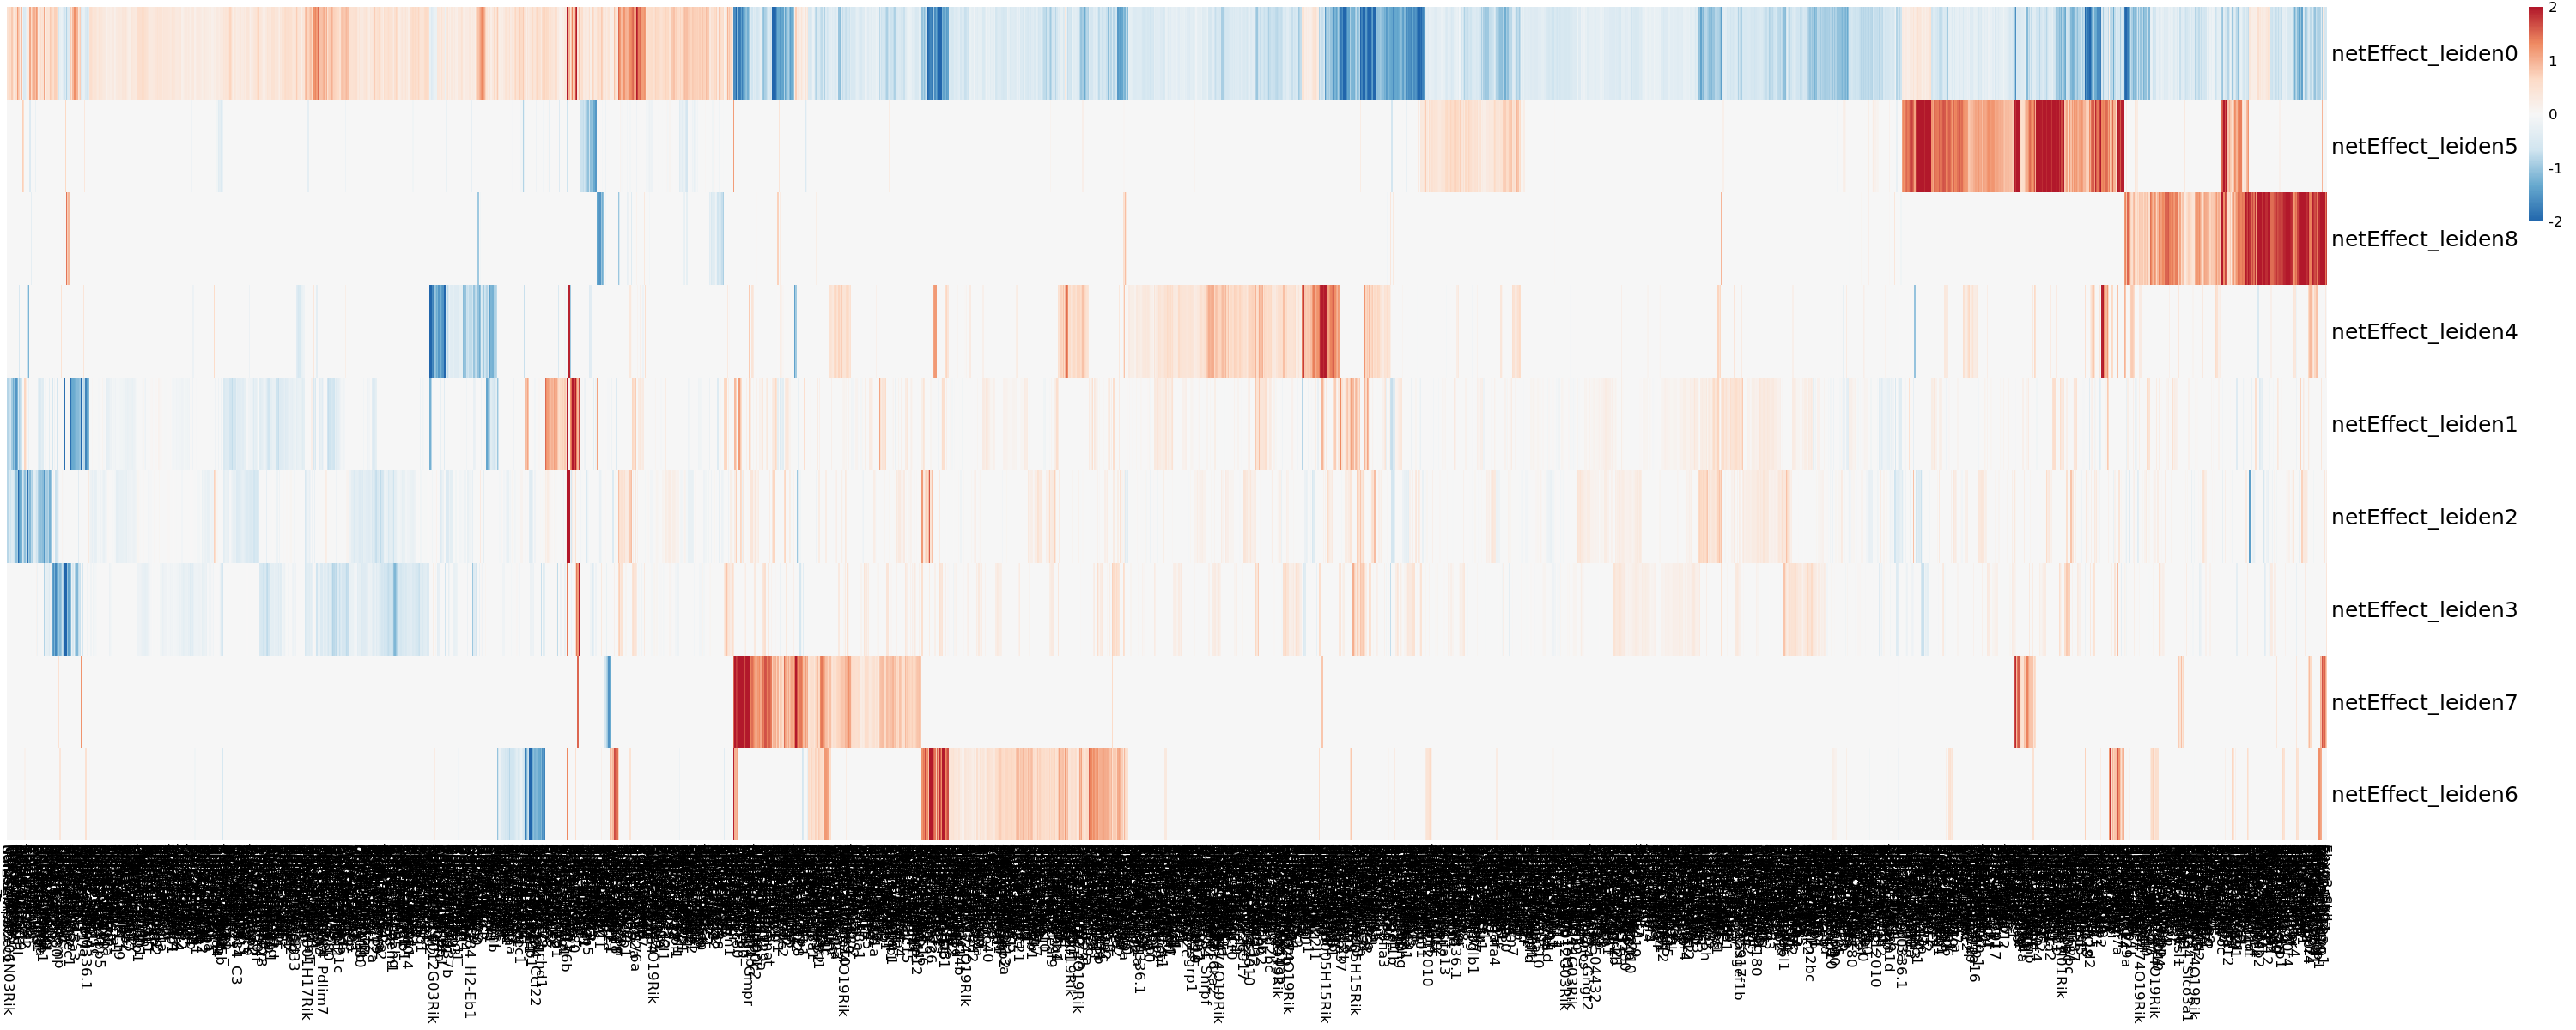

In [111]:
options(repr.plot.width=25, repr.plot.height=10)

pheatmap(t(tpm_base), color = colorRampPalette(rev(brewer.pal(n = 7, name = "RdBu")))(200), clustering_method = "ward.D", treeheight_col = 0, treeheight_row = 0,fontsize_row = 15)

In [ ]:
baseLevels = unique(interactionTerms[,c("KOGeneName", "respGene", "baseLevelEstimate","baseLevelPvals")])
baseLevels <- unique(baseLevels)
baseLevelsOriginal = copy(baseLevels)
baseLevels <- merge(baseLevels, cGuides[,c("KOGeneName", "GuideGroup")], by="KOGeneName")
baseLevels <- merge(baseLevels, cGenes[,c("respGene", "GeneGroup")], by="respGene")

baseLevels <- baseLevels[,c("respGene", "KOGeneName", "baseLevelEstimate", "GuideGroup", "GeneGroup")]
colnames(baseLevels) <- c("respGene", "KOGeneName", "LevelEstimate", "GuideGroup", "GeneGroup")
baseLevels$cluster = 0
head(baseLevels)

In [ ]:
allLevels = copy(baseLevels)
for(cluster in 1:8){
    leidenk <-  interactionTerms[interactionTerms$Cluster == paste0("leiden",cluster),]
    leidenkLevels = unique(leidenk[,c("KOGeneName", "respGene", "netEffect","p.value","estimate", "baseLevelEstimate","baseLevelPvals")])
    leidenkLevels <- leidenkLevels[leidenkLevels$p.value < 0.05 & leidenkLevels$baseLevelPvals < 0.05,]
    #leidenkLevels <- leidenkLevels[leidenkLevels$baseLevelPvals < 0.05,]
    leidenkLevels <- merge(leidenkLevels, cGuides[,c("KOGeneName", "GuideGroup")], by="KOGeneName")
    leidenkLevels <- merge(leidenkLevels, cGenes[,c("respGene", "GeneGroup")], by="respGene")
    leidenkLevels$cluster = cluster

    leidenkLevels <- leidenkLevels[,c("respGene", "KOGeneName", "netEffect", "GuideGroup", "GeneGroup", "cluster")]
    colnames(leidenkLevels) <- c("respGene", "KOGeneName", "LevelEstimate", "GuideGroup", "GeneGroup", "cluster")
    
    allLevels <- rbind(allLevels, leidenkLevels)
}


allLevels$cluster <- factor(allLevels$cluster, levels=unique(allLevels$cluster))



In [ ]:
head(allLevels)

In [ ]:
head(allLevels)

In [ ]:
options(repr.plot.width=20, repr.plot.height=10)
library("ggpubr")
myClist = list(c("0","1"), c("0","2"), c("0", "3"), c("0","4"))
ggplot(allLevels, aes(y=LevelEstimate, x=cluster, fill=cluster)) +
          geom_boxplot()+
          facet_grid(GuideGroup~GeneGroup, scales = "free_x")+
          #geom_density(alpha=0.6)+
          # stat_summary(fun.data="mean_sdl",
          #            geom="crossbar", width=0.2, color="red")+
          #stat_summary(aes(label=round(..y..,2)), fun.y="median", geom="text", size=5)+
          stat_compare_means(method="wilcox.test",paired = FALSE,
                                    comparisons = myClist,
                                    color="red",
                                   aes(label = ..p.signif..))+
          labs(x="", x = "Clonal overlap percentage (%)")+
          #scale_y_continuous(trans = "log2")+
         # scale_fill_manual(values=c("lightskyblue1", "palegreen", "peachpuff", "lightcoral", "thistle2"))+
          theme_bw()+theme(axis.text.x = element_text(angle = 90, hjust = 1, size=12))+
          geom_hline(yintercept=0, col="red")


In [ ]:
baseLevels$type <- "upReg"
baseLevels[baseLevels$baseLevelEstimate < 0, "type"] = "downReg"

In [ ]:
tpm_base <- reshape(baseLevels[,c("KOGeneName", "respGene", "baseLevelEstimate")], idvar="KOGeneName", timevar="respGene", v.names="baseLevelEstimate", direction="wide", sep="_")
rownames(tpm_base) <- tpm_base$KOGeneName
tpm_base$KOGeneName <- NULL
colnames(tpm_base) <- sapply(colnames(tpm_base), function(x){strsplit(x,"_")[[1]][2]})
head(tpm_base)

In [ ]:
cGuides$GuideName <- as.character(cGuides$GuideName)
cGenes$GeneName <- as.character(cGenes$GeneName)
efGenes = cGenes$GeneName
efGenes = efGenes[efGenes %in% colnames(tpm_base)]

In [ ]:
head(tpm_base)

In [ ]:
tpm_base <- tpm_base[cGuides$GuideName,efGenes]

In [ ]:
tpm_base[is.na(tpm_base)] = 0

In [ ]:
tpm_base[tpm_base > 0.2] = 0.2
tpm_base[tpm_base < -0.2] = -0.2


In [ ]:
dim(tpm_base)

In [ ]:
options(repr.plot.width=30, repr.plot.height=20)
pheatmap(tpm_base, cluster_cols = FALSE, cluster_rows = FALSE, color = colorRampPalette(rev(brewer.pal(n = 7, name = "RdBu")))(200))

In [ ]:
options(repr.plot.width=20, repr.plot.height=20)
library("corrplot")
M = cor(tpm_base)
M[M > 0.2] = 0.2
M[M < -0.2] = -0.2
pheatmap(M, cluster_cols = FALSE, cluster_rows = FALSE, color = colorRampPalette(rev(brewer.pal(n = 7, name = "RdBu")))(200))

In [ ]:
options(repr.plot.width=20, repr.plot.height=20)
M = cor(t(as.matrix(tpm_base)))

In [ ]:
diag(M) = 0

In [ ]:
options(repr.plot.width=20, repr.plot.height=20)
M = cor(t(as.matrix(tpm_base)))
M[M < -0.2] = -0.2
M[M > 0.2] = 0.2

pheatmap(M, cluster_cols = FALSE, cluster_rows = FALSE, color = colorRampPalette(rev(brewer.pal(n = 7, name = "RdBu")))(200))

In [ ]:
head(M)

In [ ]:
options(repr.plot.width=12, repr.plot.height=7)

tpm = data.frame(matrix(0, ncol = nrow(cGenes), nrow= nrow(cGuides)))

colnames(tpm) = cGenes$GeneName
rownames(tpm) = cGuides$GuideName


In [ ]:
rownames(tpm)

In [ ]:

for(i in colnames(tpm)){
    
    for(j in rownames(tpm)){
        
        if(nrow(baseLevels[baseLevels$KOGeneName== j & baseLevels$respGene==i, ] ) > 0){
            tpm[i,j] = baseLevels[baseLevels$KOGeneName == j & baseLevels$respGene == i, "baseLevelEstimate"]
        }
    }  
}



In [ ]:
pheatmap(tpm, cluster_cols = FALSE, cluster_rows = FALSE)

In [ ]:
## Get the ICA factors we computed
ICAFactors = data.frame(read.csv('/home/beraslan/jovian-work/analysisSingle/ICA_15_factors_effectedGenes_paper.csv',  stringsAsFactors = FALSE), stringsAsFactors = FALSE)
ICAFactors = melt(ICAFactors, measure.vars=colnames(ICAFactors))
dim(ICAFactors)
ICAFactors$Factor = sapply(ICAFactors$variable, function(x){strsplit(as.character(x),"group")[[1]][1]})


In [ ]:
ICAMy = data.frame(read.csv('/home/beraslan/jovian-work/analysisSingle/ICA_15_factors_effectedGenes_paper.csv',  stringsAsFactors = FALSE), stringsAsFactors = FALSE)


In [ ]:
F6Genes = c(ICAMy$Factor.6.gene.group.1, ICAMy$Factor.6.gene.group.2)
F6Genes = F6Genes[F6Genes !=' ']
F6Genes

In [ ]:
F6Guides = c(ICAMy$Factor.6.guide.group.1, ICAMy$Factor.6.guide.group.2)
F6Guides = F6Guides[F6Guides !=' ']
F6Guides

In [ ]:
# allData = data.frame()
# for(i in seq(0, 320, 10)){
#     for(j in seq(1,1041 , 20)){
#           k <- readRDS(paste0("/home/beraslan/jovian-work/analysisSingle/ClusterInteractions/coefs_",i,"_",i+10,"_",j,"_",j+20,".rds"))
#           k <- k[grepl('*\\GENE_*', k$term),]
#           #k = data.table(k)
#           #k[,FDR:=p.adjust(p.value),by=respGene]
        
#          # for(elem in unique(k$respGene)){
#          #    k[k$respGene == elem, "FDR"] = k$FDR <- p.adjust(k[k$respGene == elem, "p.value"])
#          #  }
          
#           allData <- rbind(allData, k)
#     }
# }

#saveRDS(allData, "/home/beraslan/jovian-work/analysisSingle/ClusterInteractions/AllCoefsCombined_FDR.rds")

In [ ]:
head(allData)

In [ ]:
head(interactionTerms)

In [ ]:
#write.csv(interactionTerms, paste0("/home/beraslan/jovian-work/analysisSingle/ClusterInteractions/SignificantKOLeidenInteractions.csv"), row.names=FALSE)

In [ ]:
tp = data.frame(matrix(0, nrow=length(F6Genes), ncol=length(F6Guides)))
rownames(tp) = F6Genes
colnames(tp) = F6Guides

for(i in rownames(tp)){
    #print(paste0("iiii", i))
    for(j in colnames(tp)){
        #print(j)
        if(nrow(baseLevels[baseLevels$KOGeneName== j & baseLevels$respGene==i & baseLevels$baseLevelPvals < 0.05, ] ) > 0){
            tp[i,j] = baseLevels[baseLevels$KOGeneName== j & baseLevels$respGene==i, "baseLevelEstimate"]
        }
    }
}

In [ ]:
head(tp)

In [ ]:
tp_melted = melt(tp, measure.vars=colnames(tp))
tp_melted$EffectedGene = rownames(tp)
tp_melted <- tp_melted[,c("variable", "EffectedGene", "value")]
colnames(tp_melted) = c("KOGene", "EffectedGenes", "value")
tp_melted$Group = "Leiden 0"

In [ ]:
head(tp_melted)

In [ ]:
allTP = copy(tp_melted)

for(cluster in 1:8){

    leidenk = interactionTerms[interactionTerms$Cluster == paste0("leiden",cluster),]
    leidenkLevels = unique(leidenk[,c("KOGeneName", "respGene", "netEffect","p.value","estimate", "baseLevelEstimate","baseLevelPvals")])
    leidenkLevels <- leidenkLevels[leidenkLevels$p.value < 0.05 & leidenkLevels$baseLevelPvals < 0.05,]
    
    leidentp = copy(tp)
    
    for(i in rownames(leidentp)){
        #print(paste0("iiii", i))
        for(j in colnames(leidentp)){
            #If the baselevel and the interaction is significant update the effect size with the net effect
            if(nrow(leidenkLevels[leidenkLevels$KOGeneName== j & leidenkLevels$respGene==i & leidenkLevels$baseLevelPvals < 0.05 & leidenkLevels$p.value < 0.05, ] ) > 0){
                leidentp[i,j] = leidenkLevels[leidenkLevels$KOGeneName== j & leidenkLevels$respGene==i, "netEffect"]
            }
        }
    }
    
    leidentp_melted = melt(leidentp, measure.vars=colnames(leidentp))
    leidentp_melted$EffectedGene = rownames(leidentp)
    leidentp_melted <- leidentp_melted[,c("variable", "EffectedGene", "value")]
    colnames(leidentp_melted) = c("KOGene", "EffectedGenes", "value")
    leidentp_melted$Group = paste0("leiden",cluster)
    
    allTP = rbind(allTP, leidentp_melted)

}

allTP$type = "Upreg"
allTP[allTP$value < 0, "type"] = "Downreg"


In [ ]:
ggplot(allTP, aes(y=value, x=Group)) +
          geom_violin(trim=FALSE,  aes(fill=type))+
          facet_wrap(.~type, scales = "free_x")+
          #geom_density(alpha=0.6)+
          stat_summary(fun.data="mean_sdl",
                     geom="crossbar", width=0.2, color="red")+
          stat_summary(aes(label=round(..y..,2)), fun.y="mean", geom="text", size=5)+
          # stat_compare_means(method="wilcox.test",paired = FALSE,
          #                           comparisons = myClist,
          #                           color="red",
          #                          aes(label = ..p.signif..))+
          labs(x="", x = "Clonal overlap percentage (%)")+
          #scale_y_continuous(trans = "log2")+
         # scale_fill_manual(values=c("lightskyblue1", "palegreen", "peachpuff", "lightcoral", "thistle2"))+
          theme_bw()+theme(axis.text.x = element_text(angle = 90, hjust = 1, size=12))


In [ ]:
head(unlist(tp))

In [ ]:
options(repr.plot.width=10, repr.plot.height=5)
tp_temp <- unlist(tp) 
tp_temp <- tp_temp[tp_temp!=0]
head(tp_temp)

hist(tp_temp, breaks=100)
#ggplot(tp_temp) +
#  geom_histogram(position="dodge", binwidth = 0.1)
  #theme(legend.position="top")+scale_color_manual(values=c("#999999", "#E69F00", "#56B4E9"))

In [ ]:
options(repr.plot.width=10, repr.plot.height=5)

myDF <- data.frame(values=tp_temp, type="upreg", stringsAsFactors = FALSE)
myDF[myDF$values < 0, "type"] ="downreg"
head(myDF)
library(plyr)
mu <- ddply(myDF, "type", summarise, grp.mean=median(values))
mu

 ggplot(myDF, aes(y=values, x=type)) +
          geom_violin(trim=FALSE,  aes(fill=type))+
          #facet_wrap(.~compType, scales = "free_x")+
          #geom_density(alpha=0.6)+
          stat_summary(fun.data="mean_sdl",
                     geom="crossbar", width=0.2, color="red")+
          stat_summary(aes(label=round(..y..,2)), fun.y="mean", geom="text", size=5)+
          # stat_compare_means(method="wilcox.test",paired = FALSE,
          #                           comparisons = myClist,
          #                           color="red",
          #                          aes(label = ..p.signif..))+
          labs(x="", x = "Clonal overlap percentage (%)")+
          #scale_y_continuous(trans = "log2")+
         # scale_fill_manual(values=c("lightskyblue1", "palegreen", "peachpuff", "lightcoral", "thistle2"))+
          theme_bw()+theme(axis.text.x = element_text(angle = 90, hjust = 1, size=12))
 

In [ ]:
options(repr.plot.width=7, repr.plot.height=15)
tp_temp = copy(tp)
tp_temp[tp_temp > 0.2]=0.2
tp_temp[tp_temp < -0.2] = -0.2
pheatmap(tp_temp, cluster_cols = FALSE, cluster_rows = FALSE)

In [ ]:
# tp = data.frame(matrix(0, nrow=length(F6Genes), ncol=length(F6Guides)))
# rownames(tp) = F6Genes
# colnames(tp) = F6Guides

for(i in rownames(tp)){
    #print(paste0("iiii", i))
    for(j in colnames(tp)){
        #print(j)
        if(nrow(leiden3Levels[leiden3Levels$KOGeneName== j & leiden3Levels$respGene==i, ]) > 0){
            tp[i,j] = tp[i,j] + leiden3Levels[leiden3Levels$KOGeneName== j & leiden3Levels$respGene==i, "estimate"]
        }
    }
}

options(repr.plot.width=7, repr.plot.height=15)
tp[tp > 0.2]=0.2
tp[tp < -0.2] = -0.2
pheatmap(tp, cluster_cols = FALSE, cluster_rows = FALSE)

In [ ]:
tp = data.frame(matrix(0, nrow=length(F6Genes), ncol=length(F6Guides)))
rownames(tp) = F6Genes
colnames(tp) = F6Guides

for(i in rownames(tp)){
    #print(paste0("iiii", i))
    for(j in colnames(tp)){
        #print(j)
        if(nrow(leiden8Levels[leiden8Levels$KOGeneName== j & leiden8Levels$respGene==i, ]) > 0){
            tp[i,j] = leiden8Levels[leiden8Levels$KOGeneName== j & leiden8Levels$respGene==i, "estimate"]
        }
    }
}

options(repr.plot.width=7, repr.plot.height=15)
tp[tp > 0.2]=0.2
tp[tp < -0.2] = -0.2
pheatmap(tp, cluster_cols = FALSE, cluster_rows = FALSE)

In [ ]:
tp = data.frame(matrix(0, nrow=length(F6Genes), ncol=length(F6Guides)))
rownames(tp) = F6Genes
colnames(tp) = F6Guides

for(i in rownames(tp)){
    #print(paste0("iiii", i))
    for(j in colnames(tp)){
        #print(j)
        if(nrow(leiden5Levels[leiden5Levels$KOGeneName== j & leiden5Levels$respGene==i, ]) > 0){
            tp[i,j] = leiden5Levels[leiden5Levels$KOGeneName== j & leiden5Levels$respGene==i, "estimate"]
        }
    }
}

options(repr.plot.width=7, repr.plot.height=15)
tp[tp > 0.2]=0.2
tp[tp < -0.2] = -0.2
pheatmap(tp, cluster_cols = FALSE, cluster_rows = FALSE)

In [ ]:
baseLevels[baseLevels$KOGeneName== j & baseLevels$respGene==i, "baseLevelEstimate"]

In [ ]:
deneme <- unique(interactionTerms[,c("KOGene", "respGene")])

In [ ]:
## Consider only the knock outs that have significant interactions with leiden clusters for at least 5 response genes
m <- table(deneme$KOGene)
m = names(m[m > 5])
interactionTermsSgn <- interactionTerms[interactionTerms$KOGene %in% m,]
interactionTermsSgn <- interactionTermsSgn[order(interactionTermsSgn$KOGene, interactionTermsSgn$Cluster),]
interactionTermsSgn <- data.table(interactionTermsSgn)
interactionTermsSgn$allNGeneClus <- paste0(interactionTermsSgn$KOGene, "_", interactionTermsSgn$Cluster)
interactionTermsSgn <- data.table(interactionTermsSgn)
interactionTermsSgn[,NGeneClus:=.N,by=allNGeneClus]
interactionTermsSgn <- data.frame(interactionTermsSgn)


In [ ]:
## Consider only the interactions that have affected at least 5 genes
hehe <- unique(interactionTermsSgn[,c("allNGeneClus", "NGeneClus")])
hehe = hehe[hehe$NGeneClus > 5,]

In [ ]:
interactionTermsRep = interactionTermsSgn[interactionTermsSgn$allNGeneClus %in% hehe$allNGeneClus,]
interactionTermsRep <- data.frame(interactionTermsRep)

In [ ]:
ICAFactors$type <- sapply(ICAFactors$Factor, function(x){strsplit(x,"\\.")[[1]][3]})
ICAFactorsGenes <- ICAFactors[ICAFactors$type == "gene",]

In [ ]:
head(ICAFactorsGenes)

In [ ]:
options(repr.plot.width=12, repr.plot.height=8)

tpm = data.frame(matrix(0, ncol = length(unique(interactionTermsRep$allNGeneClus)), nrow= length(unique(ICAFactorsGenes$Factor))))

colnames(tpm) = unique(interactionTermsRep$allNGeneClus)
rownames(tpm) = unique(ICAFactorsGenes$Factor)

for(i in unique(interactionTermsRep$allNGeneClus)){
    effectedGenes = interactionTermsRep[interactionTermsRep$allNGeneClus == i, "respGene"]
    #print(effectedGenes)
    print(paste0(i, " number of affected genes: ", length(unique(effectedGenes))))
    
    
    for(j in unique(ICAFactorsGenes$Factor)){
        factorGenes = ICAFactorsGenes[ICAFactorsGenes$Factor == j, "value"]
        availNo = length(which(effectedGenes %in% factorGenes))
        availPercent = availNo/length(unique(effectedGenes))
        print(paste0(" available number of genes in factor ", j, " is ", availNo, " percentage is ", availPercent))
        tpm[j, i] = availPercent
    }

}

pheatmap(tpm, cluster_cols = FALSE)

In [ ]:
tpm

In [ ]:
options(repr.plot.width=12, repr.plot.height=7)

tpm = data.frame(matrix(0, ncol = length(unique(interactionTermsRep$allNGeneClus)), nrow= length(unique(cGenes$GeneGroup))))

colnames(tpm) = unique(interactionTermsRep$allNGeneClus)
rownames(tpm) = unique(cGenes$GeneGroup)

for(i in unique(interactionTermsRep$allNGeneClus)){
    effectedGenes = interactionTermsRep[interactionTermsRep$allNGeneClus == i, "respGene"]
    #print(effectedGenes)
    #print(paste0(i, " number of affected genes: ", length(unique(effectedGenes))))
    
    
    for(j in unique(cGenes$GeneGroup)){
        moduleGenes = cGenes[cGenes$GeneGroup == j, "GeneName"]
        availNo = length(which(effectedGenes %in% moduleGenes))
        availPercent = availNo/length(unique(effectedGenes))
        #print(paste0(" available number of genes in gene group ", j, " is ", availNo, " percentage is ", availPercent))
        tpm[j, i] = availPercent
        
    }

}

pheatmap(tpm, cluster_cols = FALSE)

In [ ]:
head(interactionTermsRep)

In [ ]:
interactionTermsRep$KOGeneName = sapply(interactionTermsRep$KOGene, function(x){strsplit(x,"_")[[1]][2]})

In [ ]:
head(interactionTermsRep)

In [ ]:
length(unique(interactionTermsRep$term))

In [ ]:
head(interactionTermsRep)

In [ ]:
ICAFactors[ICAFactors$value == "Brap",]

In [ ]:
for(elem in unique(interactionTermsRep$term)){
    tp = interactionTermsRep[interactionTermsRep$term == elem,c("baseLevelEstimate","estimate")]
    rownames(tp) = interactionTermsRep[interactionTermsRep$term == elem,c("respGene")]
    pheatmap(tp, main = elem)

}